# Technical Indicators

Technical indicators are mathematical calculations based on the historical prices, volume etc. used to predict the direction of asset prices.

**Fundamentals of Technical Analysis** is based on analyzing trends, chart patterns, price action etc.

<img src="images/candlesticks.jpeg" alt="Drawing" style="height: 500px;"/>

# 1. Moving Averages

## Introduction 

Prices can only move in one of three directions **up**, **down** or **sideways**. 



**a. Direction**:


determines the **trend** with a flat or sideways market being **trendless**


**b. Prices:**

do not move in straight lines, they pass through a series of **peaks** and **throughs**


**c. Moving Averages**


smoothen these peaks and troughs in the long-term so as to elimante some of the market noise in the short term



**d. Best Use** 


is in directionally trending markets (i.e. upward or downward trending markets) but not trendless markets (i.e. sideways markets)



**e. Price Used:**


the most common price used is the **closing price** of a financial instrument (midpoints can also be used)


**f. Degree of Sensitivity:**

- **Very Fast:** 10-period Moving Average

    - The **more sensitive or fast** the MA, the **earlier the signals** and the **greater** the possibility of **false signals**



- **Very Slow:** 200-period Moving Average

    - The **less sensitive or slow** the MA, the **later the signals** arrive to get**in and out of a position**.



- **Optimal Solution:** 

    - MA that is **sensitive enough** to give early signals
    
    - MA thats is **insensitive enough** to avoid most of the noise signals


## 1.1 Simple Moving Average (SMA)

For an `n` day moving average we simply add up the last `n` prices and divide by `n`

$$\text{SMA}(5) = \frac{P_{t-4} +  P_{t-3} + P_{t-2} + P_{t-1} + P_{t}}{5}$$

The same weight is given to each price and only the prices in the period covered are taken in to consideration.




## 1.2 Linearly Weighted Moving Average (WMA)

This is the most sensitive and therefore the fastest moving average, as it gives a greater weight to more recent prices.

If `n = 5`:

$$\text{WMA}(5) = \frac{P_{t-4} +  2P_{t-3} + 3P_{t-2} + 4 P_{t-1} + 5 P_{t}}{1+ 2 +3 + 3 +4 +5}$$

## 1.3 Exponential Moving Average (EMA)

The n-Period Exponential Moving Average is computed in the following way:

$$\text{EMA}_t = \text{EMA}_{t-1} + (P_t - \text{EMA}_{t-1})\times \frac{2}{(n+1)}$$

where, the last term is called the **Exponential Constant** and the **first EMA is calculated using the SMA Formula**

# 2. MACD - Moving Average Convergence Divergence

**Trend Following Momentum Indicator** calculated by taking the difference between the two moving averages of an asset price (usually 12 period MA and 26 period MA) - Typically Exponential Moving Average

**- Fast MA:** 12-Period

**- Slow MA:** 26-Period

**- MACD:** MA12 - MA26

**- Signal Line:** is the moving average (usually 9-period) of the MACD line

$$\text{MACD} = \text(MA)_{12} - \text{MA}_{26}$$

## MACD is a Lagging Indicator

meaning that it **trails behind actual price action** i.e. once there is a signal, some price action has already happened and the bullish trend has already been realised.


## Interpretation of the Signal:

### a. Bullish Period

if the MACD is cutting the signal line from below 

### b. Bearish Period

if the MACD is cutting the signal line from Above 


<img src="images/MACDbasicsQQQQ.gif" alt="Drawing" style="height: 400px;"/>

<img src="images/MACDbuysellQQQQ.gif" alt="Drawing" style="height: 400px;"/>

**Drawbacks:** many false positives especially during sideways markets. 

Best used in conjuction with other trading indicators.

In [1]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
start = dt.datetime.today() - dt.timedelta(1825)
end = dt.datetime.today()

ohlcv_data = yf.download("MSFT", start, end)

[*********************100%***********************]  1 of 1 completed


In [26]:
ohlcv_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-15,55.660000,55.900002,55.090000,55.200001,50.371754,39843000
2015-12-16,55.540001,56.250000,54.759998,56.130001,51.220406,37503300
2015-12-17,56.360001,56.790001,55.529999,55.700001,50.828026,41280900
2015-12-18,55.770000,56.000000,54.029999,54.130001,49.395348,84684200
2015-12-21,54.880001,55.349998,54.230000,54.830002,50.034130,37246300


## Calculate the Fast and Slow Moving Averages, MACD and Signal Line

We do not want to fill the NaNs in technical indicators, in this case we would drop them

In [4]:
def MACD(df, fast, slow, signal):
    
    df = ohlcv_data.copy()
    df["MA_Fast"] = df["Adj Close"].ewm(span = fast, min_periods =fast).mean()
    df["MA_Slow"] = df["Adj Close"].ewm(span = slow, min_periods =slow).mean()
    df["MACD"] = df["MA_Fast"] - df["MA_Slow"]
    df["Signal"] = df["MACD"].ewm(span = signal, min_periods = signal).mean()
    df.dropna(inplace=True)
    return df

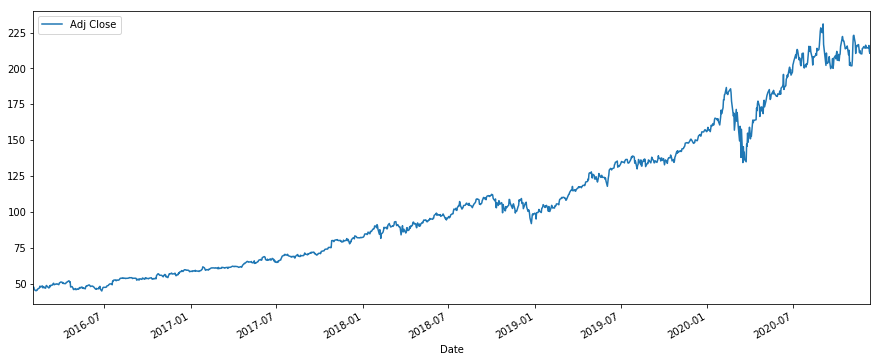

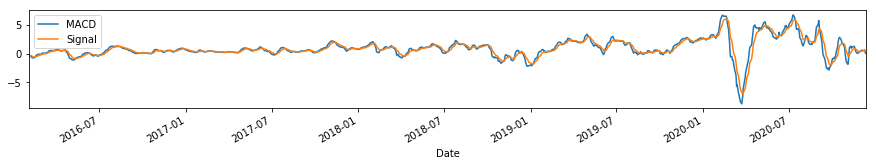

In [5]:
MACD(ohlcv_data, 12,26,9).iloc[:,[4]].plot(figsize=(15, 6))
MACD(ohlcv_data, 12,26,9).iloc[:,[8,9]].plot(figsize=(15, 2))
plt.show()

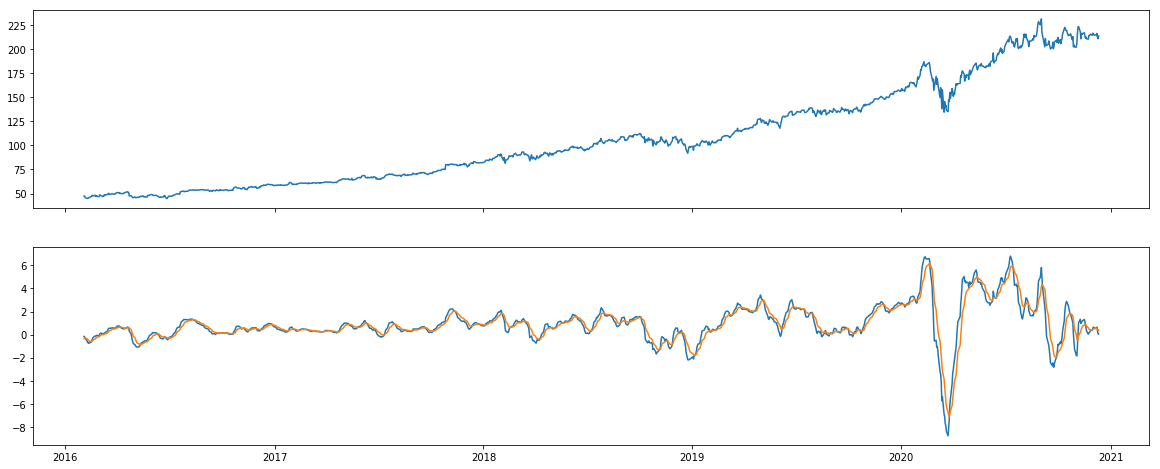

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(20,8))

ax1.plot(MACD(ohlcv_data, 12,26,9).iloc[:,[4]])


ax2.plot(MACD(ohlcv_data, 12,26,9).iloc[:,[8,9]])
plt.show()

# 3. Volatility Based Indicators

If both are in a tight band there is a breakthrough

## a. Bollinger Bands

Compriese of two lines plotted *n* standard deviation from a *m* period simple moving average line, with $n = 2$ and $m = 20$ typically.

The bands **widen** during periods of **increased volatility** and **shrink** during periods of **reduced volatility**.

<img src="images/BollingerBandsESbuysell.gif" alt="Drawing" style="height: 400px;"/>

### Computing BB:

To compute the ATR we need to make 5 calculations with our OHLCV data:

- **1. Compute N-Day Moving Average:** for the adjusted closing prices


- **2. Compute Upper Bollinger Band:** is the moving average plus 2 times the rolling standard deviation of the moving average

$$\text{BB Upper} = \text{MA} + 2\sigma_{MA}$$

- **3. Low minus Previous day close:** is the moving average minus 2 times the rolling standard deviation of the moving average

$$\text{BB Lower} = \text{MA} - 2\sigma_{MA}$$

- **4. Bollinger Band Range:** is to assess the band width

$$\text{BB Range} = \text{BB Upper} - \text{BB Lower}$$

In [7]:
def BollingerBands(df, n):
    df = df.copy()
    # n-day SMA
    df["MA"] = df["Adj Close"].rolling(n).mean()
    # Upper Band
    df["Upper Band"] = df["MA"] + 2 * df["MA"].rolling(n).std()
    # Lower Band
    df["Lower Band"] = df["MA"] - 2 * df["MA"].rolling(n).std()
    # Band width
    df["Bollinger Band Width"] = df["Upper Band"] - df["Lower Band"]
    # drop nans
    df.dropna(inplace=True)
    return df

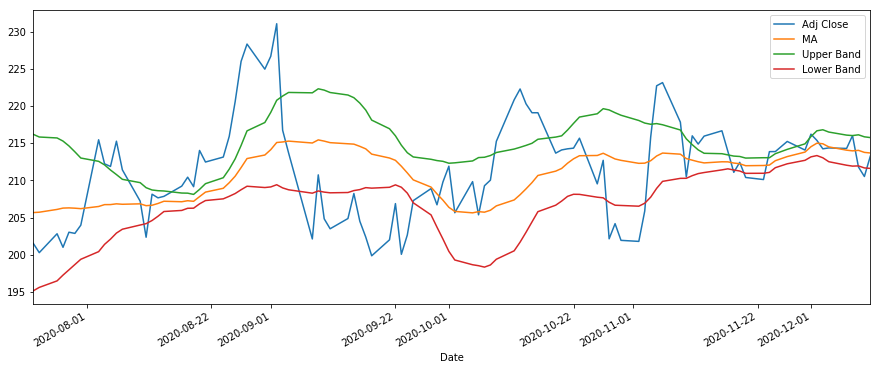

In [8]:
BollingerBands(ohlcv_data, 20)[["Adj Close", "MA", "Upper Band", "Lower Band"]].iloc[-100:,].plot(figsize=(15, 6))
plt.show()


## b. ATR - Average True Range

This indicator takes into account the market movement each day in **either direction** and then **averaging them out**.

It focuses on **total price movement** and conveys how wildly the market is swinging as it moves.

The ATR tracks volatility and provides an indication of the market’s eagerness to commit to a particular commodity.

The ATR records the average of true price range over a set period of time. The ATR is the moving average of true ran

- **High ATR readings** indicate high volume levels and suggest that a major price reversal is imminent


- **Low ATR readings** indicate low volumes and are associated with price flat-lining.

High values advised of potential market tops and bottoms whilst low values were indicative of conditions most suitable for range trading.


The Average True Range Indicator performed best using a 14 period together with longer time frames from the daily upwards. The central concept behind the ATR is that its low values advise of a poor trend direction whilst high values suggest that a trend breakout or breakdown is imminent.

Specifically, high Average True Range Indicator readings frequently occur after panic selling and buying resulting in either the formation of a market top or bottom. Low ATR values are representative of price consolidation periods.


However, the ATR’s main attribute is that, when it is registering very high readings, it is exceptionally good at advising that the market may be forming a top or bottom and that a reversal in the current direction of price could be imminent

<img src="images/ATR.gif" alt="Drawing" style="height: 400px;"/>

### Computing ATR:

To compute the ATR we need to make 5 calculations with our OHLCV data:

- **1. High minus Low:** for the daily range


- **2. High minus Previous day close:** for the daily range


- **3. Low minus Previous day close:** for the daily range


- **4. True Range:** The true range is calculated using the greatest difference between today’s high and low; the difference between today’s high and open or previous day close and between today’s low and open or previous day close.


- **5. ATR:** is the rolling mean of the true range

In [9]:
def ATR(df, n):
    df = df.copy()
    # High minus low daily range
    df["High - Low"] = abs(df["High"] - df["Low"])
    # High minus Previous day close
    df["High - Prvious Close"] = abs(df["High"] - df["Adj Close"].shift(1))
    # Low minus Previous day close
    df["Low - Prvious Close"] = abs(df["Low"] - df["Adj Close"].shift(1))
    # True Range
    df["True Range"] = df[["High - Low", "High - Prvious Close", "Low - Prvious Close"]].max(axis=1, skipna=False)
    # ATR SMA
    df["ATR"] = df["True Range"].rolling(n).mean()
    # ATR EMA
    #df["ATR"] = df["TR"].emw(span=n, adjust=false, min_periods=n).mean()
    df.drop(["High - Low", "High - Prvious Close", "Low - Prvious Close"], axis=1, inplace=True)
    return df
    

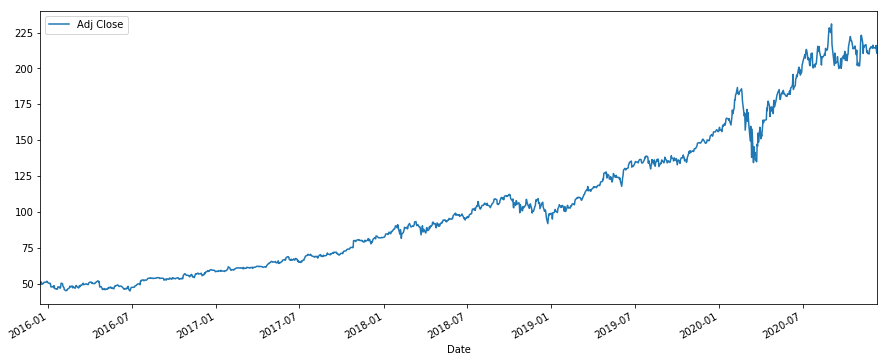

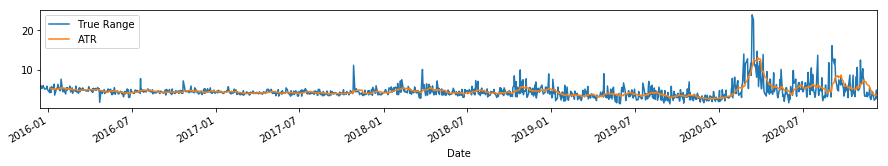

In [10]:
ATR(ohlcv_data, 14)[["Adj Close"]].plot(figsize=(15, 6))
ATR(ohlcv_data, 14)[["True Range", "ATR"]].plot(figsize=(15, 2))
plt.show()

## Combining Volatility Indicators

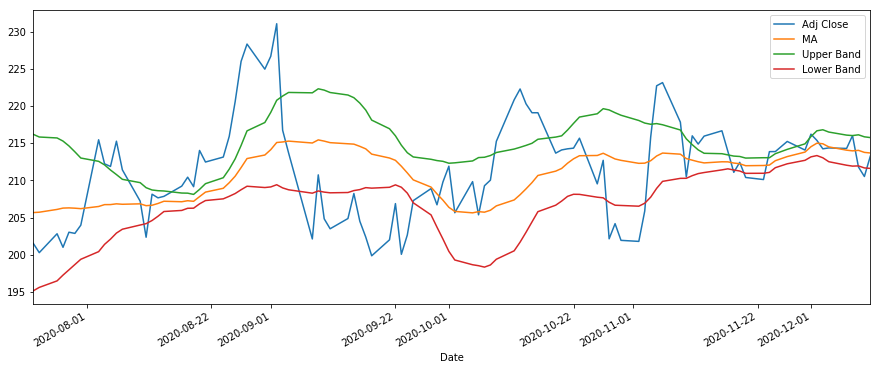

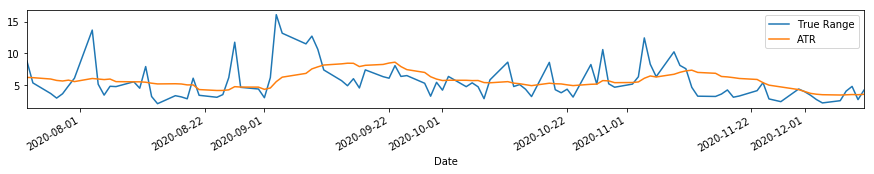

In [11]:
BollingerBands(ohlcv_data, 20)[["Adj Close", "MA", "Upper Band", "Lower Band"]].iloc[-100:,].plot(figsize=(15, 6))
ATR(ohlcv_data, 14)[["True Range", "ATR"]].iloc[-100:,].plot(figsize=(15, 2))
plt.show()

# 4. Relative Strength index - RSI

Is a **Momentum Oscillator** that measures the **speed and change of price movements**.

What is the strength of the price of a stock at any given moment compared to the previous moment.

$$\text{RSI} \in (0,100)$$

In Developed Markets: (for Emerging markets it is 80, 20)

- if $\text{RSI} > 70$ Asset has been **overbought** and correction is expected



- if $\text{RSI} < 30$ Asset has been **oversold** and a pullback is expeceted


**N.B.** assets can remain overbought and oversold for long durations

## How to Compute RSI

### Step One

The standard is to use 14 periods to calculate the initial RSI value. For example, imagine the market closed higher seven out of the past 14 days with an average gain of 1%. The remaining seven days all closed lower with an average loss of -0.8%.

$$\text{RSI}_{\text{step one}} = 100 - \frac{100}{1 + \frac{\text{Avg Gain}}{|\text{Avg Loss}|}}$$

Using the numerical example:

$$\text{RSI}_{\text{step one}} = 100 - \frac{100}{1 + \frac{\frac{1\text{%}}{14}}{\frac{-0.8\text{%}}{14}}}$$

### Step Two

This second step acts as a **smoothening technique** which is similar to how we would calculate the Exponential Moving Average. Usually, the RSI is done using a period of 14 and the 13 in the equation indicates the previous close.

$$\text{RSI}_{\text{step two}} = 100 - \frac{100}{1 + \frac{\text{Previous Avg Gain }\times 13 + \text{ Current Gain}}{(|\text{Previous Avg Loss }|\times 13 + |\text{ Current Loss}|)}}$$

## In Python 

The first value is a SMA and the remaining values are computed with the above formula, we use the Nth observation as the first N-1 observations of the SMA are going to be NaN values and we only want to get the Nth observation and NOT the entire SMA.

- **1. Delta:** the lowest price today minus closed price yesterday, daily change in closing price


- **2. Percentage Gains and Losses:** for the daily changes

    - **Gains**: if $\Delta \geq 0$ then $\Delta$ else 0
    
    - **Losses**: if $\Delta \geq 0$ then $|\Delta|$ else 0



- **3. Average Gains and losses, Previous Average Gains and losses, Current Gains and Losses:** 

    - **Average Gains and Losses:** N-Period Moving Average of the Gains and Losses
    
    - **Previous Gains and Losses:** N-1 times the N-1 Moving Average Gains and Losses
    
    - **Current Gains and Losses:** Current Daily Gains and Losses over the period N
    
    **a. If period less than Nth Observation**:
    
    $$\text{Avg Gain/Loss} = \text{NaN}$$
    
    **b. If Period is equal to the first observation, so the Nth observation:**
    
    $$\text{Avg Gain/Loss} = \text{SMA}_{N}$$
    
    **c. If Period is greater than the first observation, so the Nth observation:**
    
    $$\text{Avg Gain/Loss} = \frac{N-1\times\text{Avg Gain/Loss}_{t-1} + \text{Gain/Loss}_t}{N}$$
    

- **4. Relative Strength:** is the proportion of average over average losses

$$\text{RS} = \frac{\text{Avg Gain}}{\text{Avg Loss}}$$


- **5. Relative Strength Index (RSI):** is the final part of step two:

$$\text{RSI} = 100 - \frac{100}{1 + \text{RS}}$$


In [12]:
def RSI(df, n):
    df = df.copy()
    # 1. delta
    df["delta"] = df["Adj Close"] - df["Adj Close"].shift(1)
    # 2. gains and losses
    df["gains"] = np.where(df["delta"]>=0, df["delta"], 0)
    df["loss"] = np.where(df["delta"]>=0, abs(df["delta"]), 0)
    # 3. Get Average Gains and losses, Previous Average Gains and losses, Current Gains and Losses:
    avg_gain, avg_loss = [], []
    ## convert Series to list
    gain =  list(df["gain"])
    loss = list(df["loss"])
    for i in range(len(df)):
        ## if there are't enough days to compute the n-day moving average
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        # get average gains and losses
        elif i == n:
            # get nth observation
            avg_gain.append(df["gain"].rolling(n).mean().to_list()[n])
            avg_loss.append(df["loss"].rolling(n).mean().to_list()[n])
        # get previous avg gains and loss and current avg gain and loss in a single formula after the Nth observation
        elif i > n:
            avg_gain.append(((n-1)*avg_gain[i-1] + gain[i])/n)
            avg_loss.append(((n-1)*avg_loss[i-1] + loss[i])/n)
    # populate the dataframe
    df["avg_gain"] = np.array(avg_gain)
    df["avg_loss"] = np.array(avg_loss)
    # 4. Compute Relative Strength
    df["RS"] = df["avg_gain"]/df["loss"]
    # 5. Compute RSI
    df["RSI"] = 100 - (100/(1 + df["RS"]))
    return df["RSI"]

# 5. ADX - Average Directional Index

**Way of measuring the strength of a trend**: If the strength of a trend is weak, it could **reverse**:

  - if we are in an upward trend, if it is a weak trend it could reverse to a downard trend and viceversa.


$$\text{ADX} \in (0,100)$$


Values **quantify** the strength of a trend:


- if $\text{ADX} \in (0-25)$ Absent or weak trend, not worth following the trend



- if $\text{ADX} \in (25-50) $ Strong trend



- if $\text{ADX} \in (50-75) $ Very strong trend



- if $\text{ADX} \in (75-100) $ Extremely strong trend


**N.B.** ADX is **non-directional** meaning its value makes no inference on the direction of the trend but only on its strength



## Calculation:

How the highs and lows are changing:

- Find both positive and negative directional movements

    - by comparing successive highs and successive lows
    
- Calculate the **smoothed** average of the differences between these directional movements

### a. True Range 

$$\text{TR} = |\text{High - Low}| + |\text{High - Previous Close}| + |\text{Low - Previous Close}|$$


### b. Directional Movements

**1. DM+:** if the higher highs are greater than the lower lows we define the directional movements by the higher highs

$DM+ = \begin{cases}
  max(\text{high}_t - \text{high}_{t-1},0), \text{   if } \text{high}_t - \text{high}_{t-1} > \text{low}_{t-1} - \text{low}_{t} \\      
  0, \text{else}\\
\end{cases}$

```python 

if high_current - high_previous > low_previous - low_current:
    max(high_current - high_previous, 0)
else:
    0
```

**2. DM-:** if the lower lows are greater than the higher highs we define the directional movements by the lower lows

$DM- = \begin{cases}
  max(\text{low}_{t-1} - \text{low}_{t},0), \text{   if } \text{low}_{t-1} - \text{low}_{t} > \text{high}_{t} - \text{high}_{t-1} \\      
  0, \text{else}\\
\end{cases}$

```python 

if high_current - high_previous < low_previous - low_current:
    max(low_previous - low_current, 0)
else:
    0
```

### c. Smoothed +/- Directional Movements and True Range

Giving more weight to the more recent values, where the DM, TR here are the 14-period indicators.

#### First Step

$$\text{TR-14}_{0} = \Sigma^{14}_{t=1} \text{TR}$$

$$\text{DM}_+\text{-14}_{0} = \Sigma^{14}_{t=1} \text{DM+}$$

$$\text{DM}_-\text{-14}_{0} = \Sigma^{14}_{t=1} \text{DM-}$$

#### Second Step

$$\text{TR-14}_{t} = \text{TR-14}_{t-1} - \frac{\text{TR-14}_{t-1}}{14} + \text{TR-14}_t$$

$$\text{DM}_+\text{-14}_{t} = \text{DM}_+\text{-14}_{t-1} - \frac{\text{DM}_+\text{-14}_{t-1}}{14} + \text{DM}_+\text{-14}_t$$

$$\text{DM}_-\text{-14}_{t} = \text{DM}_-\text{-14}_{t-1} - \frac{\text{DM}_-\text{-14}_{t-1}}{14} + \text{DM}_-\text{-14}_t$$


### d. Directional Indicator (DI)

Adjusting the directional movement by dividing it by the True Range, since we need to adjust the direction of movement by its true range. 

**Example:** Successive highs are getting bigger and bigger but this may be due to the increase in volatility of the stock, something that is captured in the True Range, given it is a **volatility based indicator**

**1. DI+:**

$$\text{DI+} = 100 \times \frac{\text{DM}_+\text{-14}_{t}}{\text{TR-14}_{t}}$$

**2. DI-:**

$$\text{DI-} = 100 \times \frac{\text{DM}_-\text{-14}_{t}}{\text{TR-14}_{t}}$$

### e. DI Sum and Difference

**1. DI Sum:**

$$\text{DI Sum} = \text{DI+} + \text{DI-}$$

**2. DI Difference:**

$$\text{DI Difference} = |\text{DI+} - \text{DI-}|$$

### f. DX

Is the ratio of difference by sum

$$\text{DX} = \frac{\text{DI Difference}}{\text{DI Sum}} \times 100$$

### g. ADX

14-period ADX so first value is the simple MA of the first 14 values and the subsequent values factor in the smoothing

#### First Step

$$\text{ADX-14}_{0} = \Sigma^{14}_{t=1} \text{DX}_t$$

its the first 14-days of DX. For DX the first 14 values are NaN, but with ADX the first 13 values will be NaN since on the 14th day we get the value of 14 DXs so 13 initial ADX values are NaN.

#### First Step

$$\text{ADX-14}_{t} = \frac{\text{ADX-14}_{t-1} \times 13 + \text{DX}_t}{14} $$


In [13]:
def ADX(df, n):
    df = df.copy()
    # 1. True Range
    df["TR"] = ATR(df,n)["TR"]
    # 2. DM plus
    df["DMPlus"] = np.where((df["High"] - df["High"].shift(1)) > (df["Low"].shift(1) - df["Low"]), max(df["High"] - df["High"].shift(1),0),0)
    df["DMMinus"] = np.where((df["High"] - df["High"].shift(1)) < (df["Low"].shift(1) - df["Low"]), max(df["Low"].shift(1) - df["Low"],0),0)
    
    # 3. Smoothed DMs
    
    ## Initialise empty lists to be populated
    TR_n = []
    DM_plus_n = []
    DM_minus_n = []
    
    ## convert all Series to List
    TR = df["TR"].to_list()
    DM_plus = df["DMPlus"].to_list()
    DM_minus = df["DMMinus"].to_list()
    
    ## initialise the for loop
    for i in range(len(df)):
        if i < n:
            TR_n.append(np.nan)
            DM_plus_n.append(np.nan)
            DM_minus_n.append(np.nan)
        elif i ==n:
            TR_n.append(df["TR"].rolling(n).mean().to_list()[n])
            DM_plus_n.append(df["DMPlus"].rolling(n).mean().to_list()[n])
            DM_minus_n.append(df["DMMinus"].rolling(n).mean().to_list()[n]) 
        elif i > n:
            TR_n.append(TR_n[i-1] - (TR_n[i-1]/14) + TR[i])
            DM_plus_n.append(DM_plus_n[i-1] - (DM_plus_n[i-1]/14) + DM_plus_n[i])
            DM_minus_n.append(DM_minus_n[i-1] - (DM_minus_n[i-1]/14) + DM_minus_n[i])
            
    ## populate the dataframe again
    df["TR-N"] = np.array(TR_n)
    df["DMPlus-N"] = np.array(DM_plus_n)
    df["DMMinus-N"] = np.array(DM_minus_n)
    
    # 4. DI
    
    df["DIPlus-N"] =  100*(df["DMPlus-N"]/df["TR-N"])
    df["DIMinus-N"] =  100*(df["DMMinus-N"]/df["TR-N"])
    
    # 5. DI Sum and Difference
    
    df["DI-Diff"] = abs(df["DIPlus-N"] - df["DIMinus-N"])
    df["DI-Sum"] = df["DIPlus-N"] + df["DIMinus-N"]
    
    # 6. DX
    
    df["DX"] = 100*(df["DI-Diff"]/df["DI-Sum"])
    
    # 7. ADX
    
    ADX = []
    DX = df["DX"].to_list()
    
    for i in range(len(df)):
        if i < 2*n-1:
            ADX.append(np.nan)
        if i == 2*n-1:
            # DX value when there is ADX values plus the initial one we lose, until next day, in python this means at time t
            ADX.append(df["DX"][i - n+1:i+1].mean())
        elif i > 2*n-1:
            ADX.append(((n-1)*ADX[i-1] + DX[i])/n)
    df["ADX"] = np.array(ADX)
    return df["ADX"]

# 6. OBV - On Balance Volume - Leading Indicator

OBV is a **Momentum Indicator** that uses changes in trading volume as an indictor of future asset price movements.

**Theory behind the indicator:** Volume precedes price movement, therefore:

- **a Rising OBV:** reflects positive volume pressure that can lead to higher prices


- **a Declining OBV:** reflects negative volume pressure that can lead to lower prices

**N.B.** This indicator is prone to making **false signals** and is typically used in conjuction with lagging indicators such as the MACD.

## Calculation

Is simply the cumulative sum of volume traded adjusted for the direction of the corresponding asset price move


$OBV = OBV_{\text{prev}} + \begin{cases}
 \text{volume}, \text{ if } \text{close}_t > \text{close}_{t-1}\\      
   0, \text{ if } \text{close}_t = \text{close}_{t-1} \\
      -\text{volume}, \text{ if } \text{close}_t < \text{close}_{t-1} \\
\end{cases}$

**1. Direction:** What was the direction of price movements bewteen todays price and yesterday's price

```python
if (current_close > previous_close):
    direction = 1
else:
    direction = -1
```

**2. Volume times Direction:**

$$\text{Volume Times Direction} = \text{Volume}_t \times \text{Direction}_t$$

```python
volum_direction = current_volume * current_direction
```

**3. OBV:**

$$\text{OBV}_t = \text{OBV}_{t-1} + (\text{Volume} \times \text{Direction})_t$$

or can just use the cumulative sum.

In [14]:
def OBV(df):
    df = df.copy()
    # 1. Direction
    df["Daily Return"] = df["Adj Close"].pct_change()
    df["Direction"] = np.where(df["Daily Return"] > 0, 1, -1)
    ## first observation is zero
    df["Direction"][0] = 0
    # 2. Volume times Direction
    df["Volume times Direction"] = df["Volume"] * df["Direction"]
    # 3. OBV
    df["OBV"] = df["Volume times Direction"].cumsum()
    return df["OBV"]

# 7. Slope of the Chart

Scaling the Y-Axis so we need to use the equation:
$$Y = mx + C$$

If we do not use the $+ C$ the slope will be calculated from the origin

**So we need to define a function that calculates the slope of `n` consective points on a plot**

like a **rolling slope**

`n` is the movement of the prices of the stock:

**Short-Term:** `n=5` this means we are looking at the past week prices


**Medium-Term:** `n=20` this means we are looking at the past month prices


**Long-Term:** `n=60 to 100` this means we are looking at the past more than a month prices

### Scaling the Axes

$$y_{\text(Scaled)} = \frac{y - min(y)}{max(y) - min(y)}$$

### Converting Slope to Degrees

Slope is the rise over run which is similar to the tangent trigonometric function, therefore we have to use its reverse, arc tan, and convert the rad to degrees.

In [15]:
series = ohlcv_data["Adj Close"]
n = 5

In [16]:
def slope(series,n):
    # for the first n-1 points we will not have a slope so we can initialise an empty list 
    # not enough data points to get a slope
    slopes = [i*0 for i in range(n-1)]
    # start the loop with a rolling slope from n to last point
    for i in range(n,len(series)+1):
        y = series[i-n:i]
        # we are indifferent to the values of x so we can just put them as a list through n
        x = np.array(range(n))
        # we will need to scale the axes
        y_scaled = (y-y.min())/(y.max() - y.min())
        x_scaled = (x-x.min())/(x.max() - x.min())
        # start the OLS model
        ## Add the constant C equal to the scaled version of x
        x_scaled = sm.add_constant(x_scaled)
        ## Fit the OLS
        model = sm.OLS(y_scaled,x_scaled)
        results = model.fit()
        # get the slope which is the last item of the resulst
        slopes.append(results.params[-1])
    slope_angle = (np.rad2deg(np.arctan(np.array(slopes))))
    return np.array(slope_angle)    

In [17]:
slope(series,n)

array([  0.        ,   0.        ,   0.        , ..., -17.0607278 ,
       -36.53784211, -28.8148038 ])

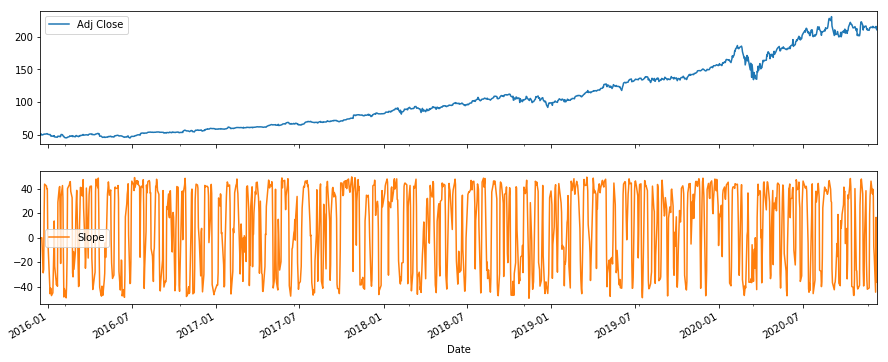

In [18]:
df = ohlcv_data.copy()
df["Slope"] = slope(series,n)
df.iloc[:,[4,6]].plot(subplots=True, layout=(2,1), figsize=(15, 6))
plt.show()

# 8. Renko Chart

Built using price movement, which is **not the price against standardized time intervals**. 

Instead of using **time intervals** this chart uses **price movement intervals**

**Scope:** Filters out the noise and lets us visualize the **true trend**

**Price Movements** are fixed and are represented as bricks stacked at 45 degrees to one another.

- a new brick is added to the chart only when the price moves by a pre-determined amount in either direction

Renko charts have a time axis but the **time scale** is not fixed:

- some bricks may take longer than others, depending on how long it takes the price to move the required box size

Typically, only closing price is used basedf on the chart time frame chosen.

**Use ATR to determine the brick size**

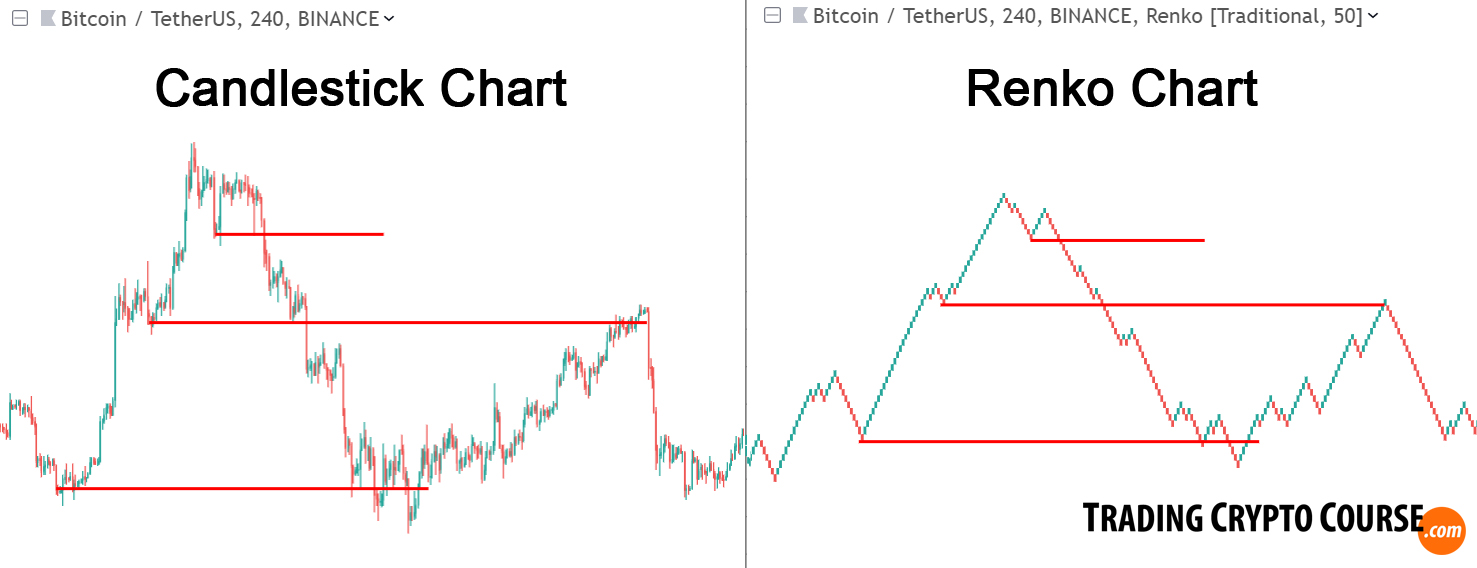

The stocktrends library needs the dataframe to have this format:

`date`, `open`, `high`, `low`, `close`

In [20]:
from stocktrends import Renko

In [21]:
# Make changes to dataframe
df = ohlcv_data.copy()
df.reset_index(inplace=True)
df = df.iloc[:,[0,1,2,3,5,6]]
df.columns = ["date", "open", "high", "low", "close", "volume"]
df.head()

,date,open,high,low,close,volume
0,2015-12-15,55.660000,55.900002,55.090000,50.371754,39843000
1,2015-12-16,55.540001,56.250000,54.759998,51.220406,37503300
2,2015-12-17,56.360001,56.790001,55.529999,50.828026,41280900
3,2015-12-18,55.770000,56.000000,54.029999,49.395348,84684200
4,2015-12-21,54.880001,55.349998,54.230000,50.034130,37246300


Assigning the brick size we can look at the last ATR values

In [22]:
ATR(ohlcv_data, 120).tail()

,Open,High,Low,Close,Adj Close,Volume,True Range,ATR
Date,,,,,,,,
2020-12-07,214.369995,215.539993,212.990005,214.289993,214.289993,24620000,2.549988,5.637561
2020-12-08,213.970001,216.949997,212.889999,216.009995,216.009995,23284100,4.059998,5.644525
2020-12-09,215.160004,215.229996,211.210007,211.800003,211.800003,32440600,4.799988,5.643524
2020-12-10,211.770004,213.080002,210.360001,210.520004,210.520004,26733300,2.720001,5.611283
2020-12-11,210.050003,213.320007,209.110001,213.259995,213.259995,30972600,4.210007,5.609815


In [23]:
def renko_dataframe(df):
    df = df.copy()
    df.reset_index(inplace=True)
    df = df.iloc[:,[0,1,2,3,5,6]]
    df.columns = ["date", "open", "high", "low", "close", "volume"]
    renko_df = Renko(df)
    # assign brick size
    renko_df.brick_size = round(ATR(ohlcv_data, 120)["ATR"][-1],0)
    df2 = renko_df.get_ohlc_data()
    return df2

# 9. TA-Lib

In [25]:
import talib